Importinng the neccessary libraries

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

Loading MNIST Dataset

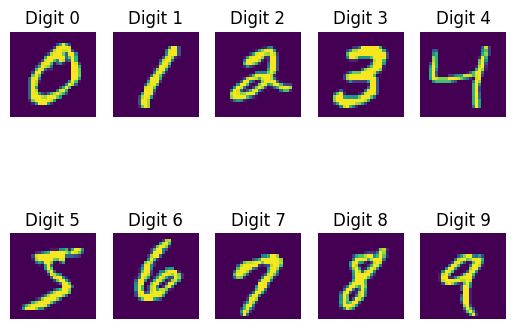

Shape of a single image is (28, 28)


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for digit in range(10):
    index = next(i for i, label in enumerate(y_train) if label == digit)

    plt.subplot(2, 5, digit + 1)
    plt.imshow(x_train[index])
    plt.title(f'Digit {digit}')
    plt.axis('off')

plt.show()

print('Shape of a single image is',x_train[1].shape)


Randomly choosing 100000 images from the dataset

In [ ]:
noimg=x_train.shape[0]
i = np.random.choice(noimg, size=10000, replace=False)
X_rand= x_train[i]
print(X_rand.shape)
X= np.resize(X_rand,(X_rand.shape[0],28*28)).transpose()


(10000, 28, 28)


Definiting the standardise function

In [ ]:
def standardise(X):
  X_ast=(X-X.mean(axis=0))/np.std(X)
  return X_ast

In [ ]:
Z=standardise(X)


Applying PCA

In [ ]:
R_X = np . dot (Z , Z . transpose () ) / X . shape [1]
R_X.shape

(784, 784)

In [ ]:
from numpy . linalg import eig
lmd , A = eig ( R_X )

idx = lmd.argsort()[::-1]
lmd = lmd[idx].real
A = A[:,idx].real

A.shape

(784, 784)

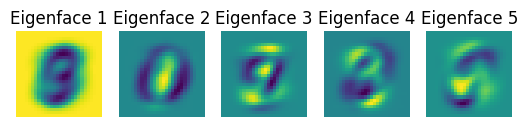

In [ ]:
fig, axes = plt.subplots(1, 5)

for i, ax in enumerate(axes.flat):
    ax.imshow((A[:,i].reshape(28,28)))
    ax.axis('off')
    ax.set_title('Eigenface {}'.format(i+1))
    if i==4:
      break

plt.show()

In [ ]:
Y=A.transpose()@Z
Y.shape

(784, 10000)

Varying the number of selected principal components (p) from 24 to 784 (both
inclusive) with the gap of 20 and reduce the dimension of the Z using the selected principal components. For each p, reconstrucing the X back and visualise the first row/image in the reconstructed X

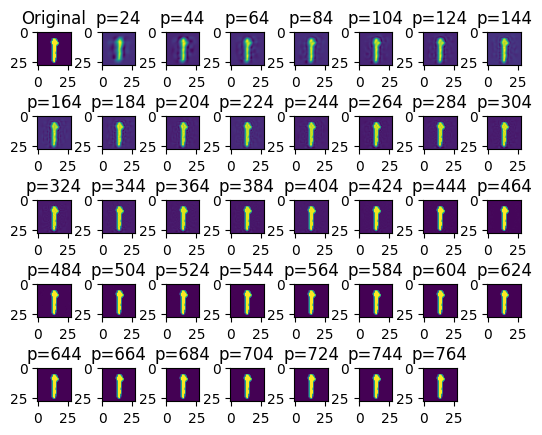

In [ ]:
from numpy import linalg
plt.subplot(5,8,1)
plt.imshow(Z[:,0].reshape(28,28))
plt.title('Original')
j=2
p=np.zeros(38)
mse=np.zeros(38)
for m in range(24,784,20):
  X_bar=np.zeros((784,10000))
  A_1 = A[:, :m]
  Y_1 = Y[:m, :]
  X_bar = np.dot(A_1,Y_1)
  abs=0
  for i in range(m,784):
   abs=abs+ lmd[i]

  e = np.linalg.norm(Z - X_bar, ord=2) / Z.shape[0]
  #e=(abs/np.sum(lmd))*100
  mse[j-2]=e
  p[j-2]=m
  #print("Value of MSE for p:",m,"=",e)
  plt.subplot(5,8,j)
  plt.imshow(X_bar[:,0].reshape(28,28))
  plt.title('p={}'.format(m))
  j=j+1

plt.subplots_adjust( hspace=1.5, wspace=0.4)


Plot the reconstruction error vs number of principal components graph

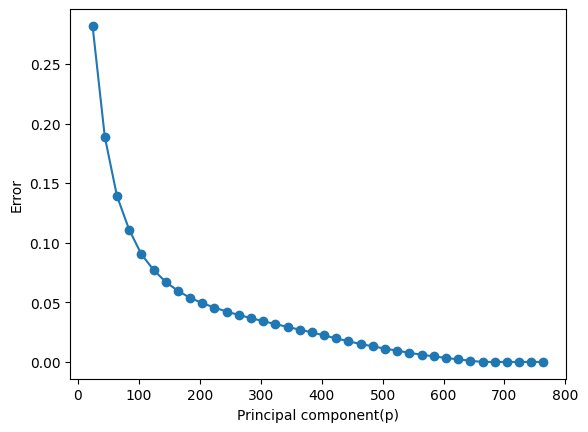

In [ ]:
plt.plot(p,mse,'o-')
plt.xlabel('Principal component(p)')
plt.ylabel('Error')
plt.show()

Finding the minimum value of p for 20% , 10%, 5%, 1% error

Value of p for MSE 20 = 29
Value of p for MSE 10 = 64
Value of p for MSE 5 = 119
Value of p for MSE 1 = 296


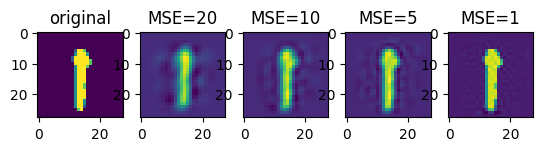

In [ ]:
p=np.array([20,10,5,1])
for j in range(4):
 for m in range(0,784):
  X_bar=np.zeros((784,10000))
  A_1 = A[:, :m]
  Y_1 = Y[:m, :]
  X_bar = np.dot(A_1,Y_1)

  abs=0
  for i in range(m,784):
   abs=abs+ lmd[i]
  plt.subplot(1,5,1)
  plt.imshow(Z[:,0].reshape(28,28))
  plt.title('original')
  if (abs/np.sum(lmd))*100 <=p[j]:
   print("Value of p for MSE",p[j],"=",m)
   plt.subplot(1,5,j+2)
   plt.imshow(X_bar[:,0].reshape(28,28))
   plt.title('MSE={}'.format(p[j]))
   break

**Observation:** It is surprising to see that we can just reduce the dimension from 784 to 296 and we will have almost no difference because MSE = 1%